In [ ]:
import os 
import cv2
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report 
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 

In [ ]:
def load_imgs(folder):
  imgs = []
  labels = []
  for file_name in os.listdir(folder):
    path = os.path.join(folder,file_name)
    img = cv2.imread(path)
    if img is not None:
      img = cv2.resize(img,(224,224))
      #img = img.flatten()
      imgs.append(img)
      labels.append(folder.split('/')[-1])
  return imgs,labels

In [ ]:
yes_folder = "yes"
no_folder = "no"

In [ ]:
yes_imgs,yes_labels = load_imgs(yes_folder)
no_imgs,no_labels = load_imgs(no_folder)

In [ ]:
total_imgs = yes_imgs + no_imgs 
total_labels = yes_labels + no_labels

In [ ]:
total_imgs = np.array(total_imgs)

In [ ]:
total_labels = np.array(total_labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(total_imgs, total_labels, test_size=0.4, random_state=42)


In [ ]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [ ]:
classes_map = {"no": 0, "yes": 1}
y_train = np.array([classes_map[label] for label in y_train])
y_test = np.array([classes_map[label] for label in y_test])

In [ ]:
nc = 2
y_train = keras.utils.to_categorical(y_train, nc)
y_test = keras.utils.to_categorical(y_test, nc)


In [ ]:
model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(nc, activation="softmax"),
    ]
)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
batch_size = 32
epochs = 13
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/13
5/5 [==============================] - 5s 970ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.5683 - val_accuracy: 0.8431
Epoch 2/13
5/5 [==============================] - 4s 769ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.5344 - val_accuracy: 0.8431
Epoch 3/13
5/5 [==============================] - 4s 766ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.5363 - val_accuracy: 0.8529
Epoch 4/13
5/5 [==============================] - 4s 834ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.5682 - val_accuracy: 0.8431
Epoch 5/13
5/5 [==============================] - 5s 892ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.5758 - val_accuracy: 0.8725
Epoch 6/13
5/5 [==============================] - 4s 765ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.5809 - val_accuracy: 0.8627
Epoch 7/13
5/5 [==============================] - 4s 761ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.5963 - val_accuracy: 0.8725
Epoch 8/13
5/5 [====

4/4 [==============================] - 1s 259ms/step


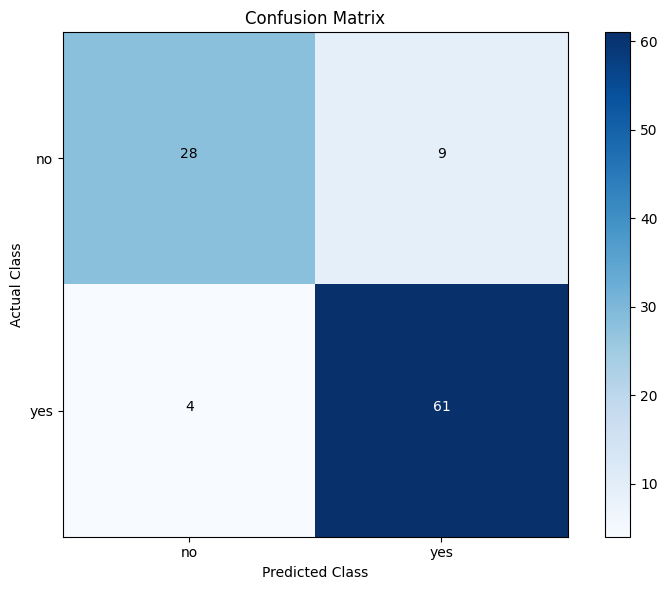

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  
y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)


class_labels = ['no', 'yes']


plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.tight_layout()

thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

In [ ]:
def image_processed(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = image.astype(np.float32) / 255.0
    image = np.expand_dims(image, axis=0)
    return image


In [ ]:
image_path = '/content/drive/MyDrive/BRAIN/brain_tumor_dataset/brain_tumor_dataset/yes/Y1.jpg'
preprocessed_image = image_processed(image_path)
predictions = model.predict(preprocessed_image)
class_index = np.argmax(predictions[0])
class_names = ['no','yes']
class_label = class_names[class_index]

1/1 [==============================] - 0s 34ms/step


In [ ]:
img_for_plot = cv2.imread(image_path)

The patient has a brain tumor!


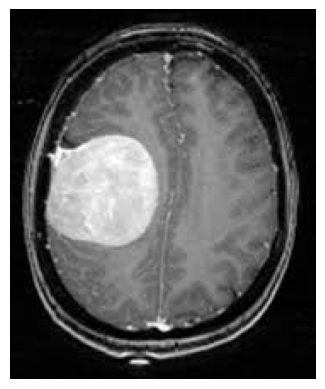

In [ ]:
if class_label == 'yes':
  print("The patient has a brain tumor!")
else:
  print("The patient has no tumor!")
plt.imshow(cv2.cvtColor(img_for_plot, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Here, I was just testing SVM, but  in the end, I opted for using keras

In [ ]:
#classifier = SVC(kernel='linear')
#classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
#y_pred = classifier.predict(X_test)
#print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.76      0.67      0.71        24
         yes       0.73      0.81      0.77        27

    accuracy                           0.75        51
   macro avg       0.75      0.74      0.74        51
weighted avg       0.75      0.75      0.74        51



In [ ]:
#img_test = cv2.imread("/content/drive/MyDrive/BRAIN/brain_tumor_dataset/brain_tumor_dataset/no/14 no.jpg")

In [ ]:
#img_test = cv2.resize(img_test,(224,224))
#img_test = img_test.flatten()
#img_test = np.array([img_test])

In [ ]:
#classifier_new_img = classifier.predict(img_test)

In [ ]:
#if classifier_new_img == 'yes':
 #   print("The image has brain tumor!")
#else:
#    print("There is no tumor here!")

There is no tumor here!
